<a href="https://colab.research.google.com/github/ChoeTaeBin/Machine-Learnig/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

합성곱 신경망을 이용해서 사진 데이터를 분류할 수 있다.

In [2]:
#데이터 준비
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
#유사 정규화
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

#검증 세트 나누기
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4422102/4422102 [==============================] - 0s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

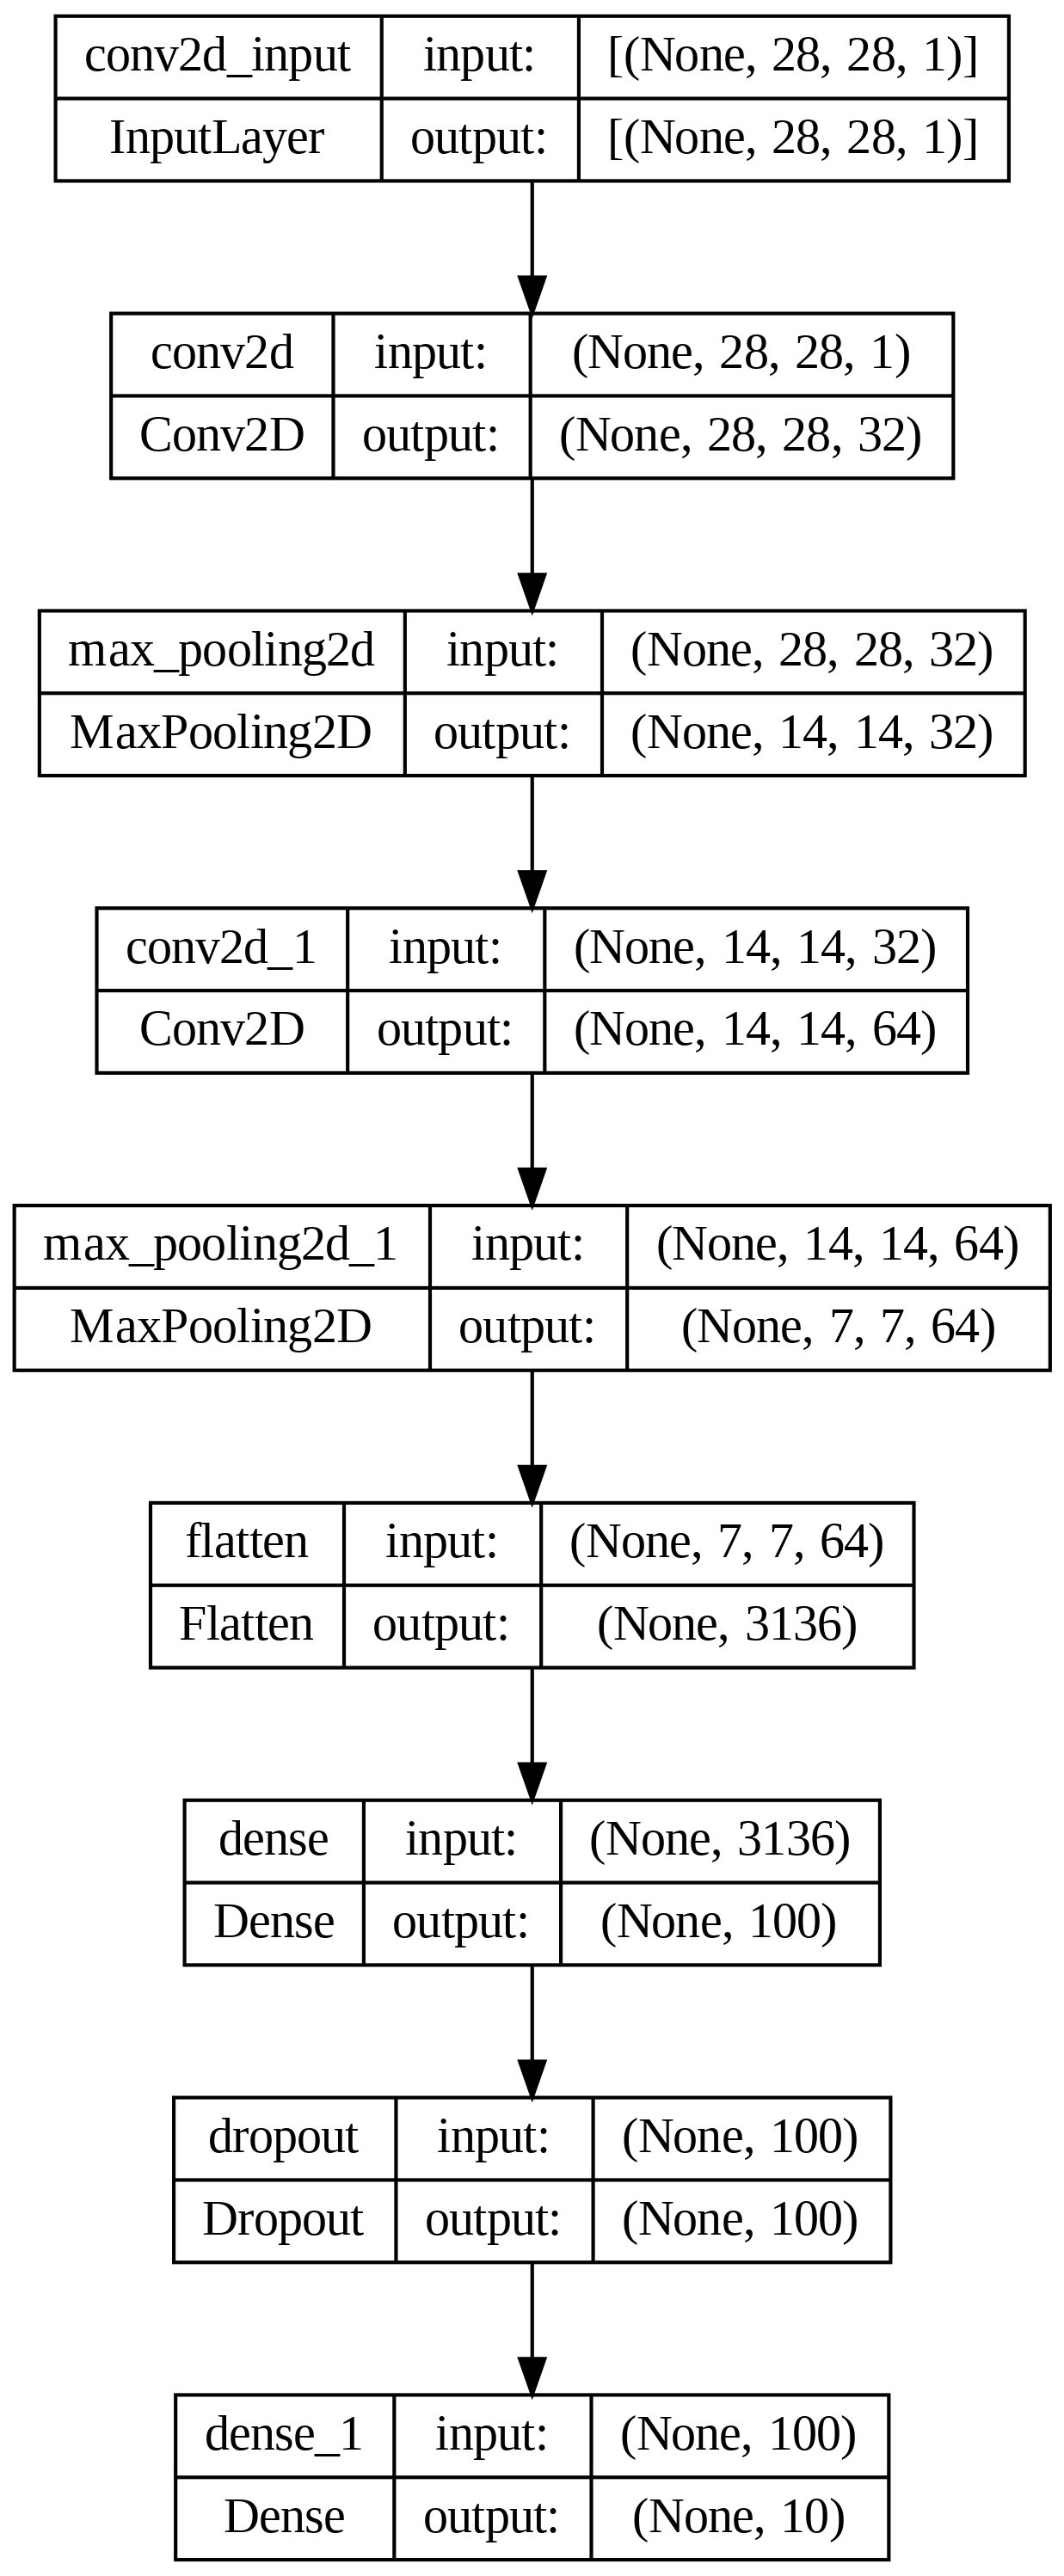

In [3]:
#모델 만들기

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1))) #합성곱 층
model.add(keras.layers.MaxPooling2D(2))#풀링 층
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same')) #합성곱 층
model.add(keras.layers.MaxPooling2D(2))#풀링 층

model.add(keras.layers.Flatten()) #flatten 층
model.add(keras.layers.Dense(100, activation='relu')) #밀집층
model.add(keras.layers.Dropout(0.4)) #drop out
model.add(keras.layers.Dense(10, activation = 'softmax')) #출력층

model.summary()

keras.utils.plot_model(model, show_shapes=True, to_file = 'cnn-architecture.png', dpi = 300)

In [4]:
#모델 설정
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

#모델 훈련
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 12s 4ms/step - loss: 0.5134 - accuracy: 0.8171 - val_loss: 0.3360 - val_accuracy: 0.8738
Epoch 2/20
  31/1500 [..............................] - ETA: 5s - loss: 0.3655 - accuracy: 0.8700

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3418 - accuracy: 0.8782 - val_loss: 0.2804 - val_accuracy: 0.8938
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2925 - accuracy: 0.8953 - val_loss: 0.2553 - val_accuracy: 0.9052
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2621 - accuracy: 0.9057 - val_loss: 0.2379 - val_accuracy: 0.9115
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2372 - accuracy: 0.9145 - val_loss: 0.2305 - val_accuracy: 0.9147
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2171 - accuracy: 0.9213 - val_loss: 0.2167 - val_accuracy: 0.9189
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2013 - accuracy: 0.9255 - val_loss: 0.2241 - val_accuracy: 0.9172
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1870 - accuracy: 0.9302 - val_loss: 0.2105 - val_accuracy: 0.9229
Epo

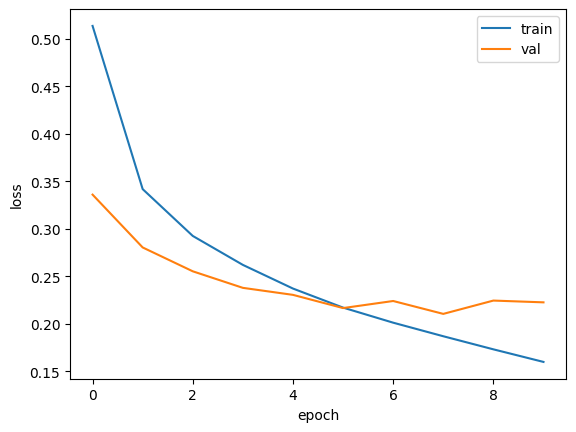

In [5]:
#그래프 그리기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [6]:
import numpy as np
#실제로 예측해보자

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '엥클부츠']
print('예측: ', classes[np.argmax(model.predict(test_input[0:1]))], '정답: ', classes[test_target[0]])


1/1 [==============================] - 0s 218ms/step
예측:  엥클부츠 정답:  엥클부츠


In [7]:
#모델 평가

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2339 - accuracy: 0.9169


[0.23391513526439667, 0.9168999791145325]

합성곱층의 가중치 시각화

In [8]:
#훈련하지 않은 모델의 합성곱층(비교대상)
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation =\
                                          'relu', padding = 'same', input_shape = (28, 28, 1)))

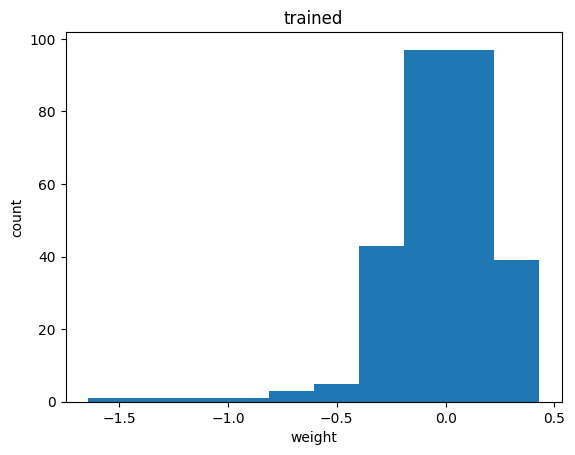

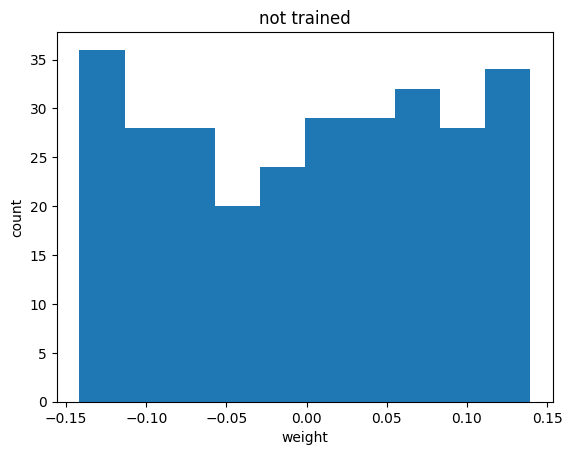

In [9]:
no_training_conv = no_training_model.layers[0] #훈련안된 합성곱층
conv = model.layers[0] #훈련된 합성곱층

#numpy 배열로 변환
no_training_weights = no_training_conv.weights[0].numpy()
conv_weights = conv.weights[0].numpy()


#히스토 그램 그리기


plt.hist(conv_weights.reshape(-1,1))
plt.title('trained')
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

plt.title('not trained')
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

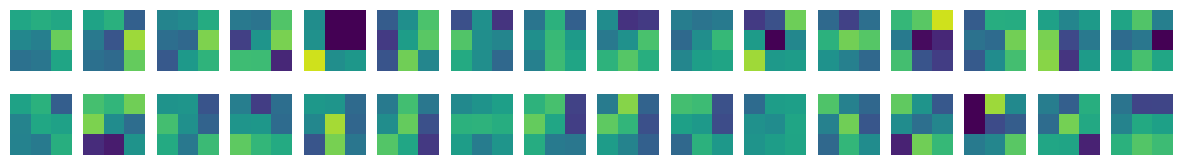

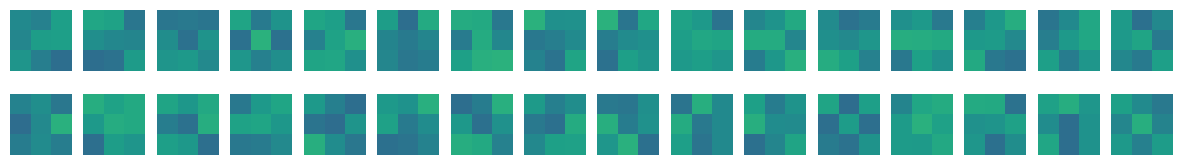

In [10]:
#각 커널을 시각화 해보자
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i,j].axis('off')

fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin = -0.5, vmax = 0.5)
    axs[i,j].axis('off')


필터의 밝은 곳과 이미지의 높은 픽셀값이 만나면 높은 값이 나오게 된다. 위의 훈련된 합성곱층의 각 필터들은 각기 무엇인가 특징을 학습한 모습을 보인다.

입력 이미지


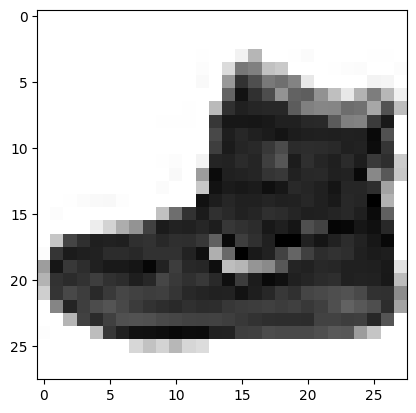

In [11]:
print('입력 이미지')
plt.imshow(train_input[0], cmap = 'gray_r')
plt.show()

1/1 [==============================] - 0s 86ms/step


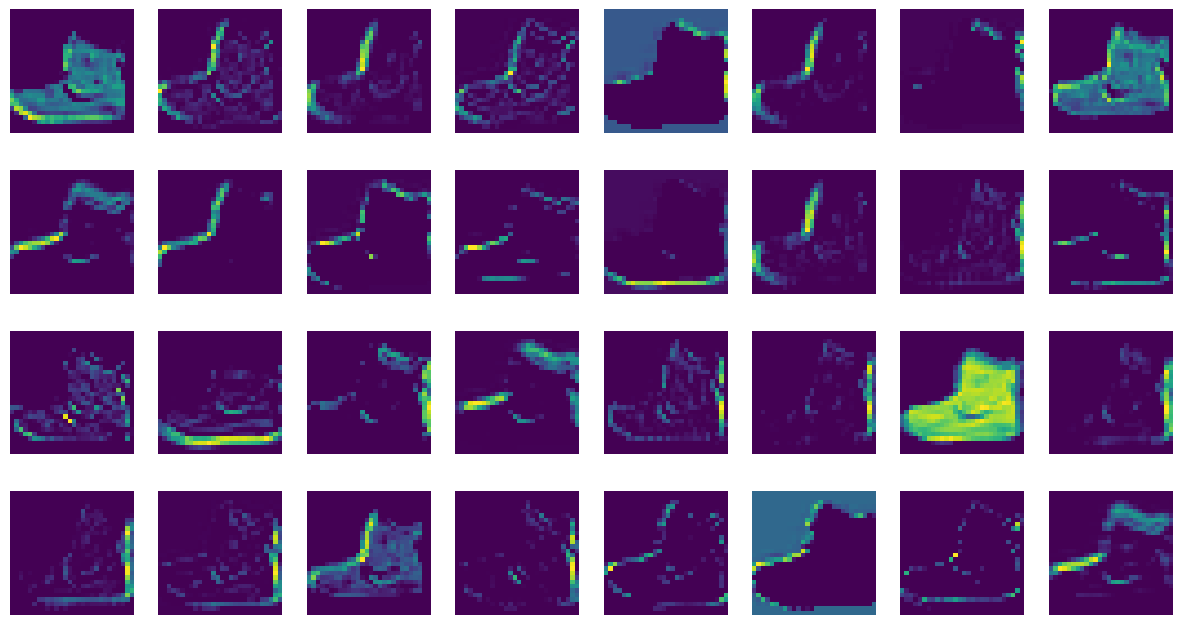

In [12]:
conv_acti = keras.Model(model.input, model.layers[0].output) #첫번째 합성곱층

inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

#각 특성맵 그리기
fig, axs = plt.subplots(4, 8, figsize = (15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :,i*8+j])
    axs[i, j].axis('off')

plt.show()